## Imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [15]:
# YOUR CODE HERE
NBA_df = pd.read_csv('NBA.csv')
NBA_df

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614
...,...,...,...,...,...,...
3995,1986,1224,565,-1.761425,-0.011698,0.082828
3996,1994,3564,1785,0.907199,-0.125856,3.542416
3997,1998,706,378,0.848178,0.694183,0.787185
3998,2003,289,156,-6.298906,0.205844,-0.312601


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [16]:
# YOUR CODE HERE
X = NBA_df[['mp']]
y = NBA_df['win_rating']

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

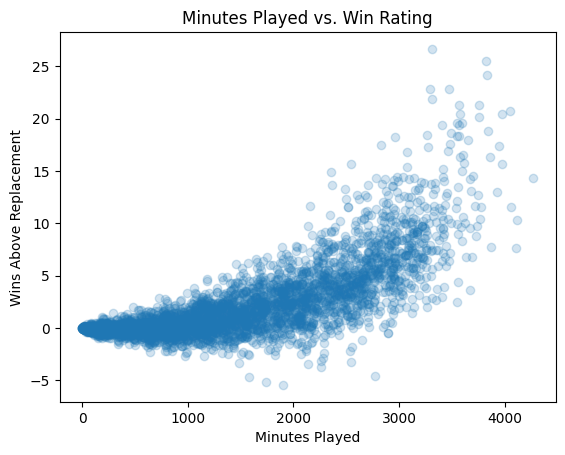

In [17]:
# YOUR CODE HERE
plt.scatter(X,y, alpha = 0.2)
plt.xlabel ("Minutes Played")
plt.ylabel ('Wins Above Replacement')
plt.title('Minutes Played vs. Win Rating')
plt.show()

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [18]:
# YOUR CODE HERE
# Create Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_results = cross_validate(model, X, y, cv=5, return_train_score=True)

# Print raw cross-validation results

print (f"cv results: {cv_results['train_score']}")


cv results: [0.56003925 0.56367302 0.5653569  0.55561258 0.55502215]


❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [19]:
# YOUR CODE HERE
min_score = cv_results['train_score'].min()
min_score

0.555022151711746

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [20]:
# YOUR CODE HERE
max_score = cv_results['train_score'].max()

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [21]:
# YOUR CODE HERE
mean_score = cv_results['train_score'].mean()
mean_score

0.5599407811376959

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.31s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



In [23]:
! git add tests/cv_results.pickle

! git commit -m 'Completed cv_results step'

! git push origin master



[master fe91963] Completed cv_results step
 1 file changed, 0 insertions(+), 0 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 411 bytes | 411.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:juliensoudet/data-linear-regression.git
   70367bb..fe91963  master -> master


❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

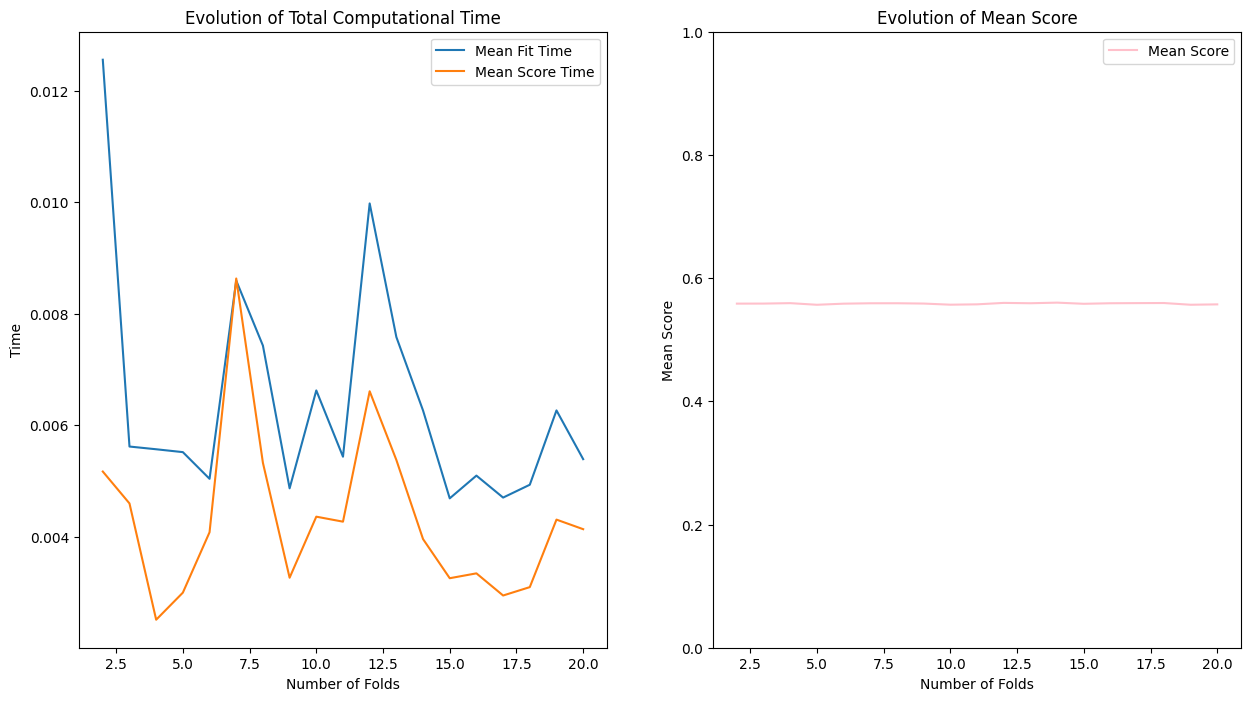

In [24]:
import numpy as np

# YOUR CODE HERE
mean_fit_time = []
mean_score = []
mean_score_time = []

# Range of K values (number of folds)
k_values = range(2, 21)

for k in k_values:
    # Create Linear Regression model
    model = LinearRegression()
    
    # Perform cross-validation with current number of folds (K)
    cv_results = cross_validate(model, X, y, cv=k, return_train_score=True)
    
    # Calculate mean fit time, mean score, and mean score time
    mean_fit_time.append(np.mean(cv_results['fit_time']))
    mean_score.append(np.mean(cv_results['test_score']))
    mean_score_time.append(np.mean(cv_results['score_time']))

# Total Computational Time
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(k_values, mean_fit_time, label='Mean Fit Time')
plt.plot(k_values, mean_score_time, label='Mean Score Time')
plt.xlabel('Number of Folds')
plt.ylabel('Time')
plt.title('Evolution of Total Computational Time')
plt.legend()

# Mean Score
plt.subplot(1, 2, 2)
plt.plot(k_values, mean_score, label='Mean Score', color='pink')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Score')
plt.title('Evolution of Mean Score')
plt.ylim(0,1)
plt.legend()

plt.show()


In [25]:
# YOUR CODE HERE

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [26]:
# YOUR CODE HERE
model = LinearRegression()

model.fit(X, y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [27]:
# YOUR CODE HERE
slope = model.coef_[0]
slope


0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [28]:
# YOUR CODE HERE
intercept = model.intercept_
intercept


-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [29]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



In [30]:
! git add tests/trained_model.pickle

! git commit -m 'Completed trained_model step'

! git push origin master

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Linear_Regression.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	tests/improved_score.pickle

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [31]:
# YOUR CODE HERE
minutes_played = 1000
prediction = model.predict([[minutes_played]])
prediction = prediction [0]
prediction

/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1.0562050014762487

### ☑️ Test your code

In [32]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.30s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



In [33]:
! git add tests/prediction.pickle

! git commit -m 'Completed prediction step'

! git push origin master


On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Linear_Regression.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	tests/improved_score.pickle

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

In [34]:
# YOUR CODE HERE
NBA_df 

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614
...,...,...,...,...,...,...
3995,1986,1224,565,-1.761425,-0.011698,0.082828
3996,1994,3564,1785,0.907199,-0.125856,3.542416
3997,1998,706,378,0.848178,0.694183,0.787185
3998,2003,289,156,-6.298906,0.205844,-0.312601


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


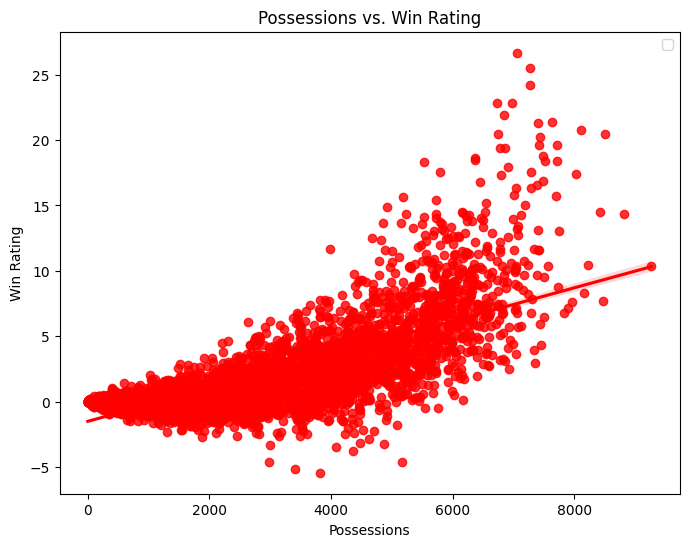

In [35]:
X = NBA_df[['poss']]
y = NBA_df['win_rating']
plt.figure(figsize=(8, 6))
sns.regplot(x=NBA_df['poss'], y=NBA_df['win_rating'], color ="red", data = NBA_df)
plt.xlabel('Possessions')
plt.ylabel('Win Rating')
plt.title('Possessions vs. Win Rating')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


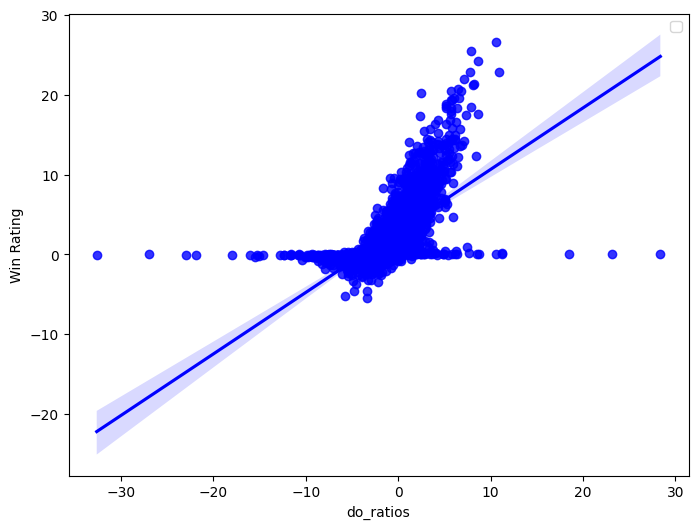

In [36]:

plt.figure(figsize=(8, 6))
sns.regplot(x=NBA_df['do_ratio'], y=NBA_df['win_rating'], color ="blue", data = NBA_df)
plt.xlabel('do_ratios')
plt.ylabel('Win Rating')

plt.legend()
plt.show()

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


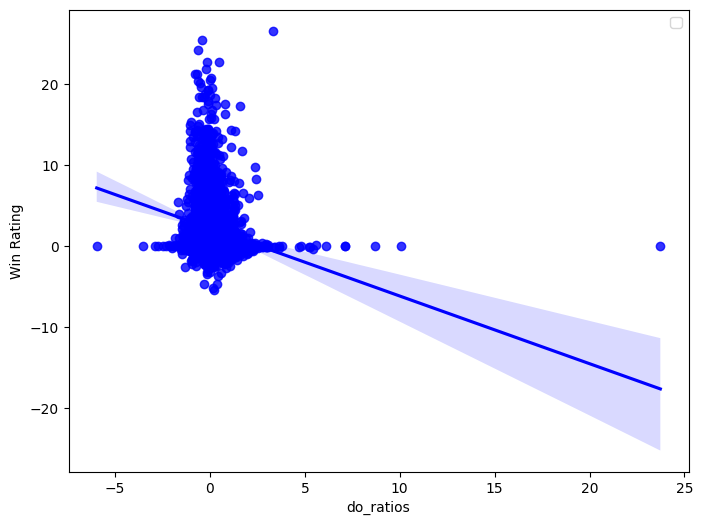

In [37]:
plt.figure(figsize=(8, 6))
sns.regplot(x=NBA_df['pacing'], y=NBA_df['win_rating'], color ="blue", data = NBA_df)
plt.xlabel('do_ratios')
plt.ylabel('Win Rating')

plt.legend()
plt.show()

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [38]:
# YOUR CODE HERE
new_set_of_features = NBA_df[['mp',"do_ratio"]]
new_set_of_features 

,mp,do_ratio
0,2409,-1.546275
1,2708,0.996587
2,2407,0.242598
3,585,-1.343806
4,2056,-1.813990
...,...,...
3995,565,-1.761425
3996,1785,0.907199
3997,378,0.848178
3998,156,-6.298906


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [40]:
# YOUR CODE HERE
X = NBA_df[['poss', 'do_ratio']]  # Features: Possessions and Minutes Played
y = NBA_df['win_rating']  # Target: Win Rating


# Perform cross-validation to get scores
scores = cross_val_score(model, new_set_of_features, y, cv=3)  # 3-fold cross-validation

# Calculate mean score
mean_2_feat_score = scores.mean()

print("Mean Score of the new model with standardized 'Poss' and 'MP' features:", mean_2_feat_score)


Mean Score of the new model with standardized 'Poss' and 'MP' features: 0.6318244532882361


### ☑️ Test your code

In [41]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.34s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



In [42]:
! git add tests/improved_score.pickle

! git commit -m 'Completed improved_score step'

! git push origin master



[master f6ee43b] Completed improved_score step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/improved_score.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 517 bytes | 57.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-linear-regression.git
   fe91963..f6ee43b  master -> master


You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁